In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [9]:
#Loading the dataset
df = pd.read_csv('../data/IMDB-Dataset.csv')

# Data Preprocessing

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spicytalha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#Customize Stopwords as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might", "film", "one"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'while', 'this', 'here', 'as', 'doesn', "needn't", 'be', 'but', 'should', 'because', 'other', 'there', 'myself', 'had', "you're", 'their', 'some', "hasn't", 'yours', 'all', 'those', 've', 'me', 'our', 'one', 'wouldn', 'were', 'did', 'again', "that'll", 'during', 'do', "she's", "it's", 'each', 'these', 'him', 'very', 'now', "aren't", 'needn', 'until', 'such', 'shall', 'yourselves', 'hers', 'she', 'been', 'having', 'am', 'don', 'who', "wasn't", 'in', 'them', 'then', 'll', 'only', 'i', 'shouldn', 'that', 'over', 'your', 'itself', 'aren', "shouldn't", 'with', 'own', 'or', 'few', 'nor', 'couldn', 'what', 'up', 't', 'has', 'mustn', 'hasn', 'any', 'an', 'out', 'how', 'ma', 'ours', 'just', 'is', 'was', 'above', 'about', 'from', "didn't", 'the', 'will', 'further', 'when', 're', 'at', "isn't", 'being', 'ain', 'of', 'would', 'haven', 'yourself', 'under', "wouldn't", 'could', 'for', 'by', 'through', 'themselves', 'against', 'it', 'too', 's', "mightn't", 'wasn', 'mightn', 'we', 'hadn', 'isn', 'mor

In [16]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

In [17]:
#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [18]:
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* Isenção de responsabilidade: eu só assisti esse filme como um acordo condicional. E eu vejo filmes de graça. Eu não seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crítica mais curta de todos os tempos. Não vê este filme. É de longe o filme mais estúpido, lamenta, preguiçoso e inacreditavelmente UNFUNNY que eu já vi. É um desastre total. Mas como o meu ódio por este filme e por outros, se estende muito além de uma exibição, acho que vou continuar um pouco. Não conheço nenhuma das pessoas do filme além de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso não importa. Eles são todos horríveis, embora eu ache que esse seja o ponto. A edição é horrível e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrível do que eu pensava. Agora eu sei que esses filmes não devem ser sérios, mas vamos lá, é o cinema 101 que se alguém fizer um pequeno corte facial, ele...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserve attention li...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

# Data Analysis

In [19]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [20]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [21]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149753
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [22]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149753
Unique movie names:14206
No of ratings:150000


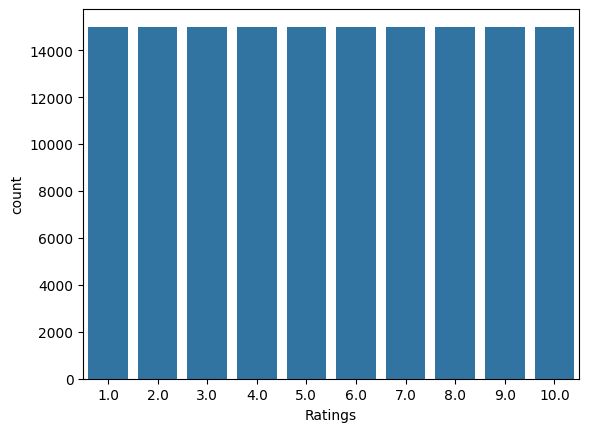

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [23]:
#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

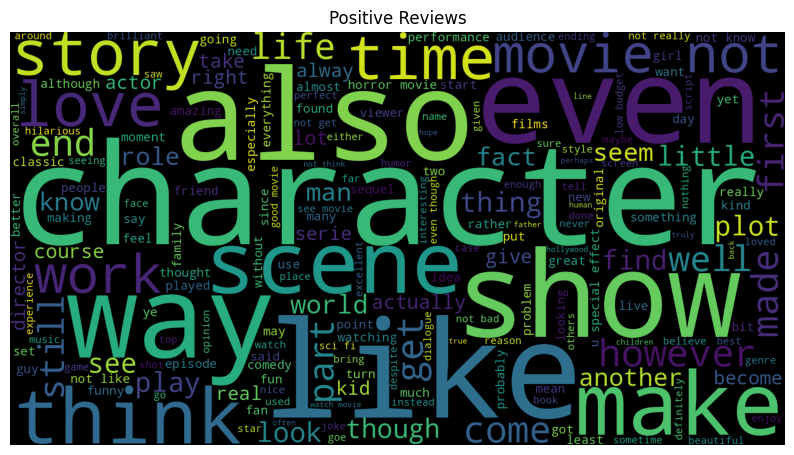

In [24]:
#Visualization of Important Words from Positive Reviews
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7])) #Positive Reviews
neg=' '.join(map(str,sentences[df['Ratings']<=4])) #Negative Reviews
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) #Positive Reviews WordCloud for Visualization

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

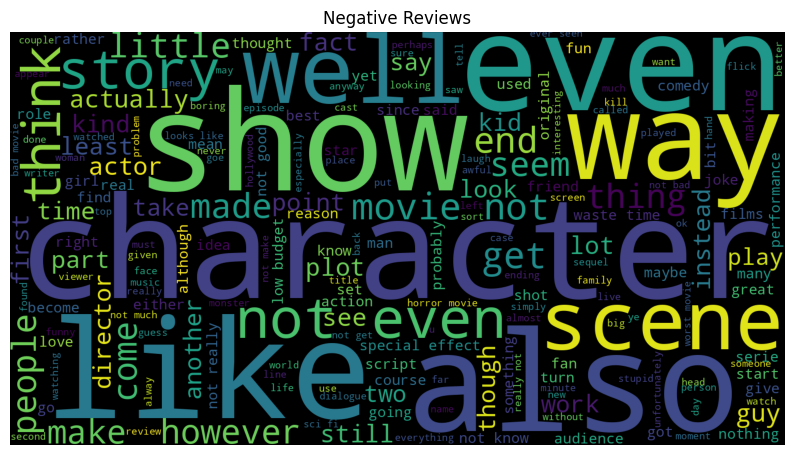

In [25]:
#Visualization of Important Words from Negative Reviews
  
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) #Positive Reviews WordCloud for Visualization

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

# Basic Stats of Words for both Reviews

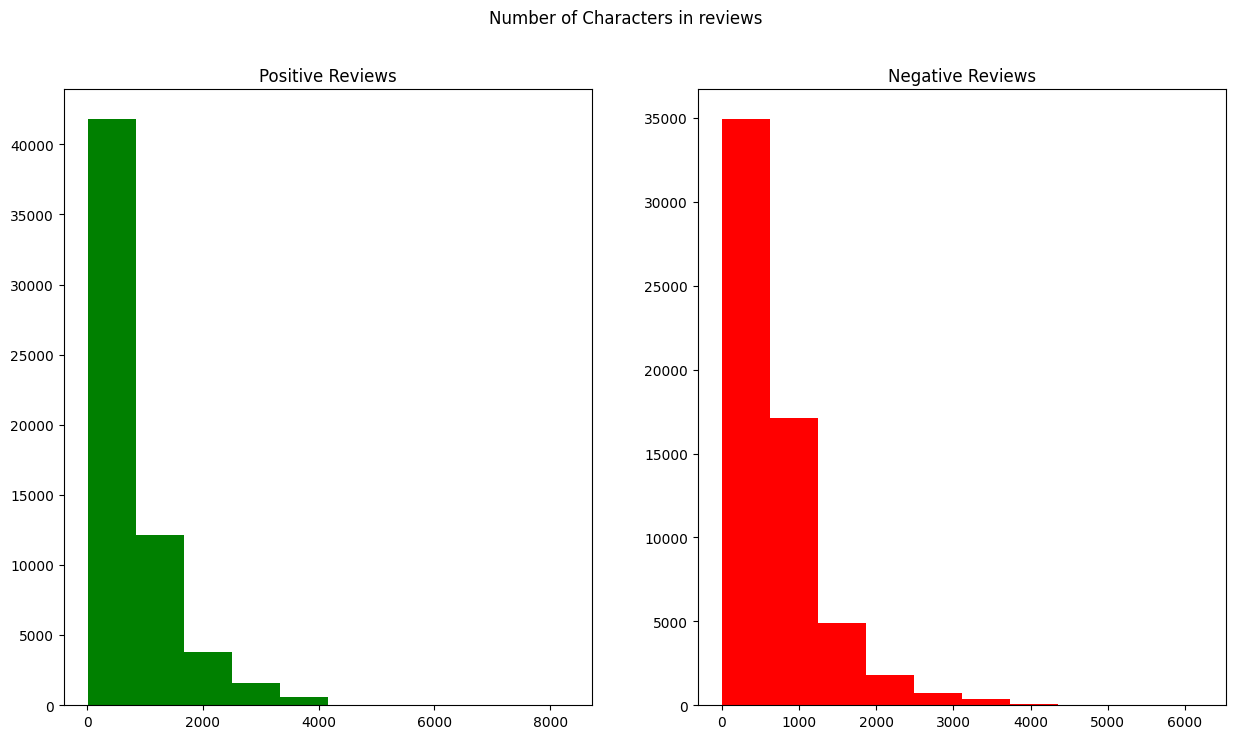

In [26]:
#Visulaization of number of character per reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len() #Positive Reviews
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len() #Negative Reviews
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews') #Total Reviews
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

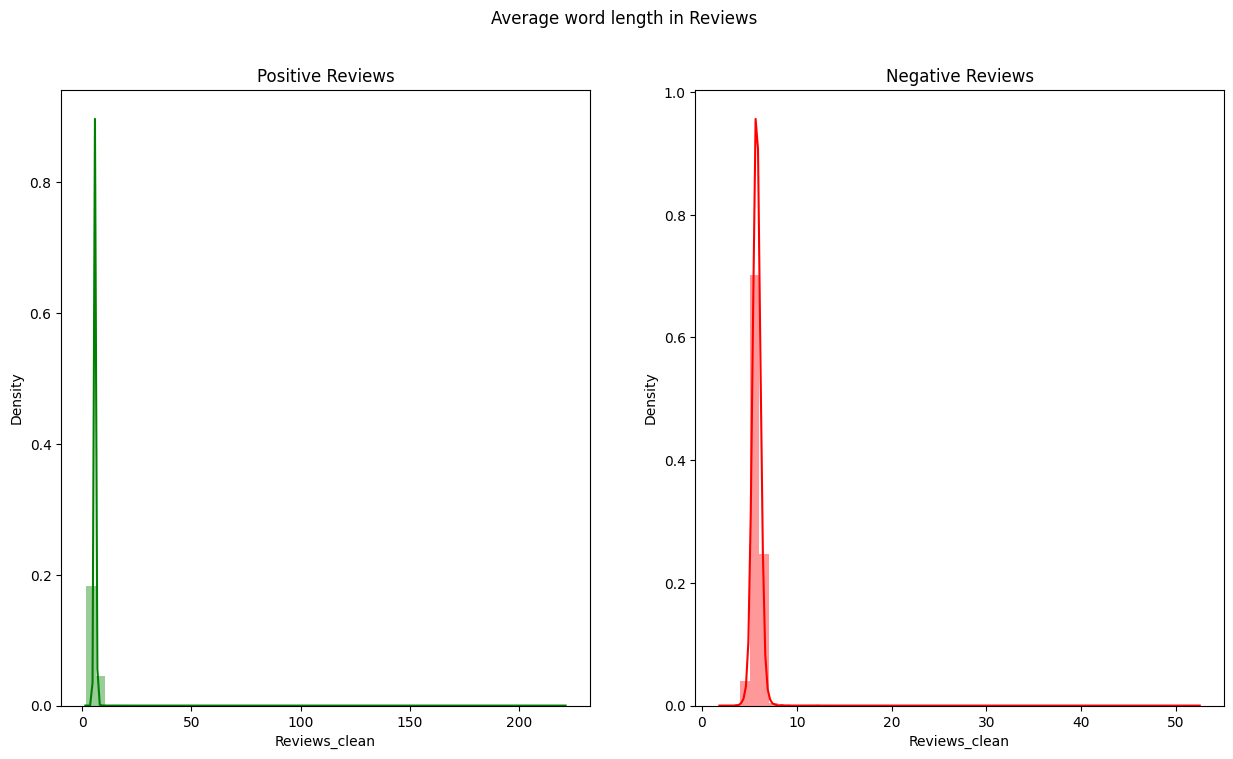

In [27]:
#Visulaize average of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')